<h1>Построение классификатора Malicious/Normal траффика, датасет - UNSW_NB15 (257673 наблюдения, 43 атрибута).</h1>

# \# 0. Описание схемы

Как уже было сказано в моих предыдущих 

# \# 1. Анализ данных

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

### Оценка исходных датасетов для обучения и теста:

In [2]:
df_train = pd.read_csv('all_expl_train.csv')
df_test = pd.read_csv('all_expl_test.csv')
df_train.shape, df_test.shape

((82332, 43), (175341, 43))

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-null int64
stcpb                82332 non-n

In [4]:
df_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557928,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


Атрибуты proto, service и state - номинальные. Значит нужно будет добавлять dummy колонки для каждого значения.

In [5]:
pd.unique(df_train['proto']).shape, pd.unique(df_train['service']).shape, pd.unique(df_train['state']).shape

((131,), (13,), (7,))

<br>
С тестовым сетом такая же ситуация

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin                 175341 non-null int64
stcpb     

In [7]:
df_test.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


In [8]:
pd.unique(df_test['proto']).shape, pd.unique(df_test['service']).shape, pd.unique(df_test['state']).shape

((133,), (13,), (9,))

В тестовом датасете присутствуют такие значения полей proto, service, state, которых нет в обучающем - необходимо пересобрать обучающий и тренировочный датасет.

<br>
Распределение по классам в собранном датасете:

Text(0.5,1,'Распределение по классам в обучающем датасете')

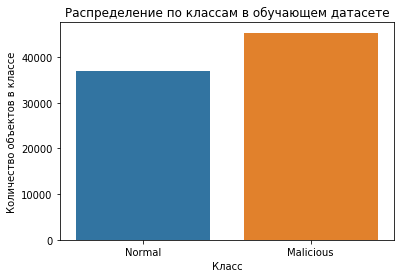

In [9]:
plt.figure()
sns.countplot(x='label', data=df_train)
plt.xlabel('Класс')
plt.ylabel('Количество объектов в классе')
plt.title('Распределение по классам в обучающем датасете')

Классы несбалансированы

In [10]:
df = pd.concat([df_train, df_test])
df['label'].value_counts()

Malicious    164673
Normal        93000
Name: label, dtype: int64

<br>
Отношение классов:

In [11]:
df['label'].value_counts()[0] / df['label'].value_counts()[1]

1.7706774193548387

<br>
Статистика по полям `proto`, `service`, `state`

In [12]:
df['proto'].value_counts()

tcp           123041
udp            92701
unas           15599
arp             3846
ospf            3271
sctp            1474
any              396
gre              313
rsvp             264
ipv6             262
sun-nd           255
mobile           253
swipe            253
pim              253
sep              251
xns-idp          133
prm              133
leaf-1           133
i-nlsp           132
sprite-rpc       132
ippc             132
kryptolan        132
pgm              132
fire             132
emcon            132
ip               132
ipcv             132
l2tp             132
qnx              132
pvp              132
               ...  
chaos            132
trunk-1          132
eigrp            132
encap            132
smp              132
pipe             132
dgp              132
idrp             132
isis             132
skip             132
dcn              132
pup              132
irtp             132
ipv6-route       132
scps             132
ggp              132
cpnx         

In [13]:
 df['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [14]:
 df['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
URN         1
no          1
PAR         1
Name: state, dtype: int64

Как и ожидалось - есть значения атрибутов, которые появляются меньше 2 раз в датасете (не сможем гарантировать попадание при разделении на обучающий и тестовый датасеты). Необходимо их исключить.

In [15]:
df = df.replace('rtp', 'any')
df = df.replace(['CLO', 'ACC', 'PAR', 'URN'], 'no')

<br>
Проводим OHE (кодирование текстовых полей в дополнительные бинарные атрибуты) и кодирование целевых значений (0 - опасный трафик, 1 - нормальный)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_ = pd.get_dummies(df, columns=['proto', 'service', 'state'])
df_['label'] = le.fit_transform(df.label)
df_y = df_.label
df_['label'].value_counts()

0    164673
1     93000
Name: label, dtype: int64

In [17]:
df_.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_REQ,state_RST,state_no
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000

<br>
### Корреляция атрибутов

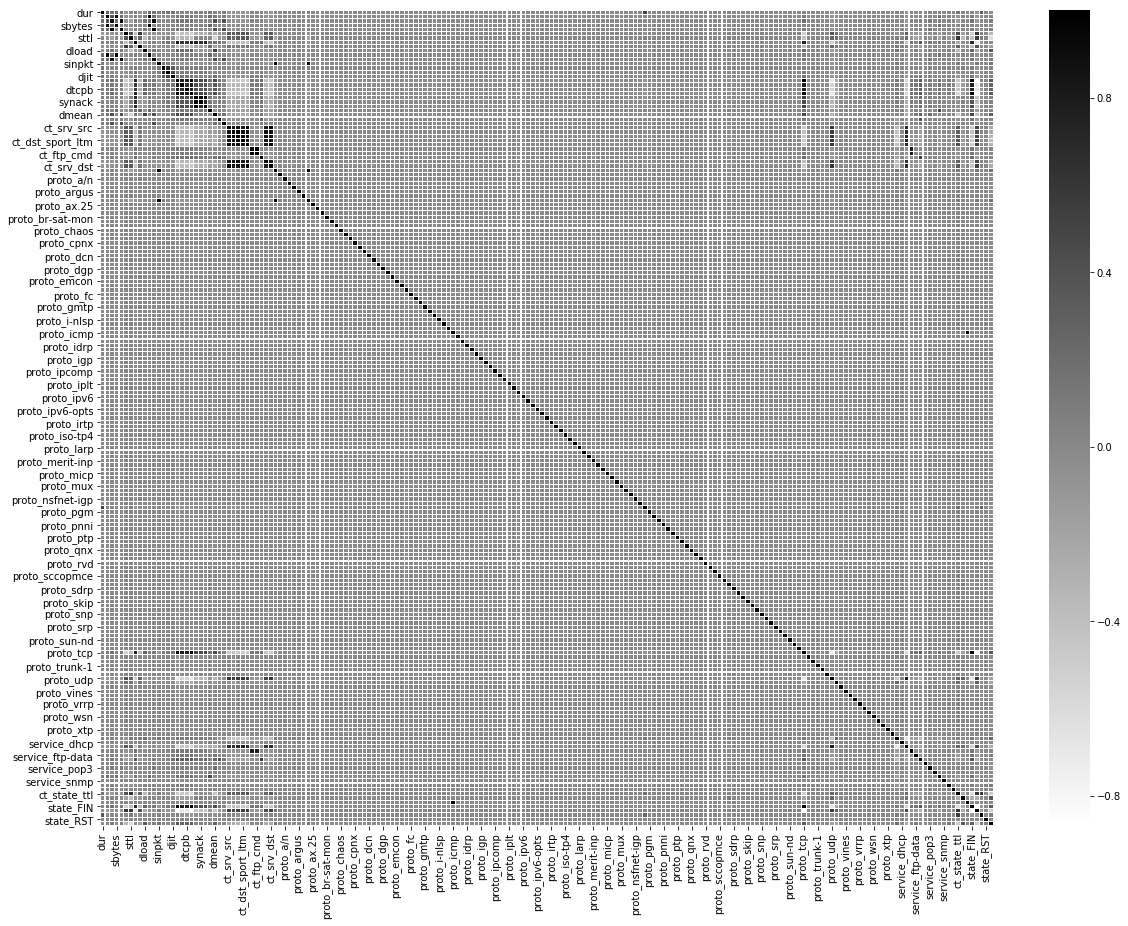

In [18]:
proto_features = [column for column in df_.columns if 'proto_' in column]
service_features = [column for column in df_.columns if 'service_' in column]
state_features = [column for column in df_.columns if 'state_' in column]
feat = proto_features + service_features + state_features
numeric_features = [column for column in df_.columns if column not in feat]
numeric_features.remove('label')

corr_matrix = df_[numeric_features + feat + ['label']].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, linewidths=.05, cmap="binary")

Зоны c ненулевой корреляцией:

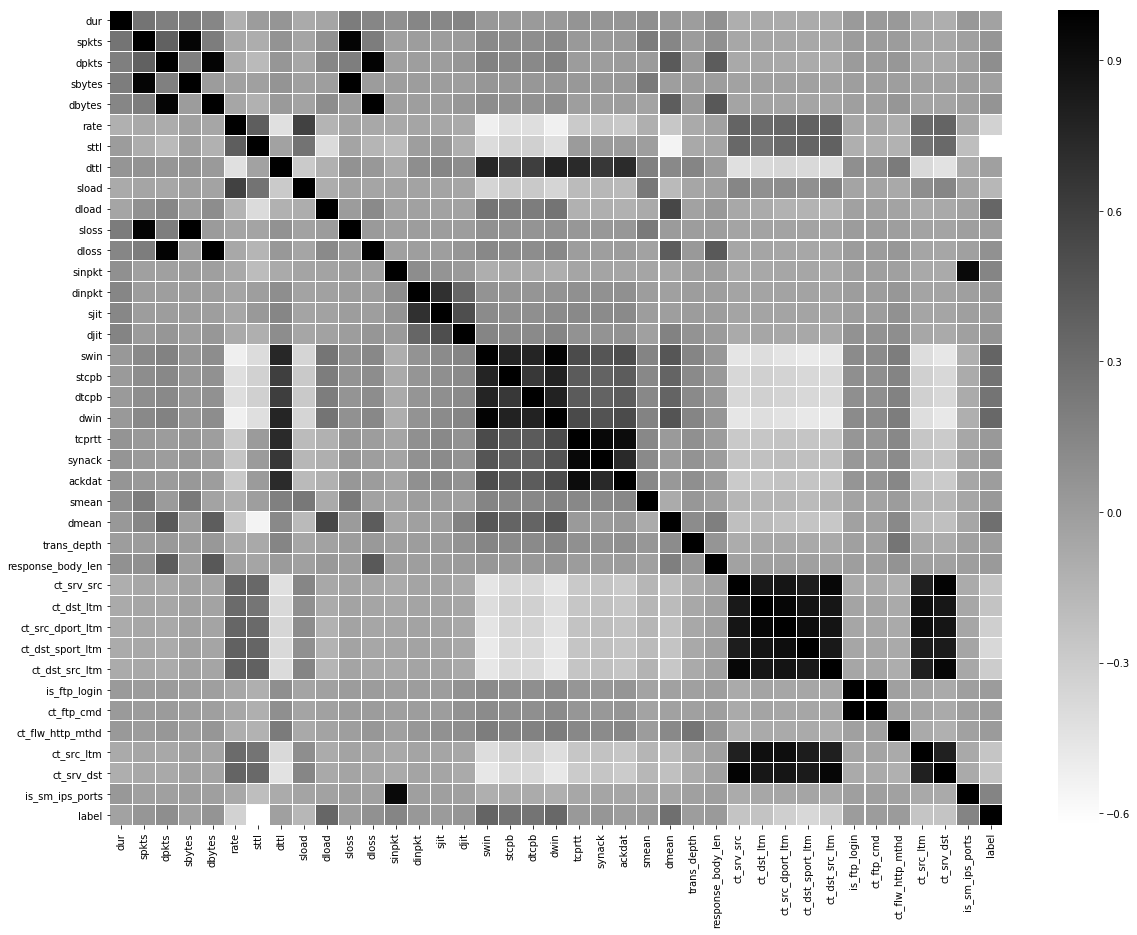

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix.loc[numeric_features + ['label'], 
                            numeric_features + ['label']], 
            linewidths=.05, cmap="binary")

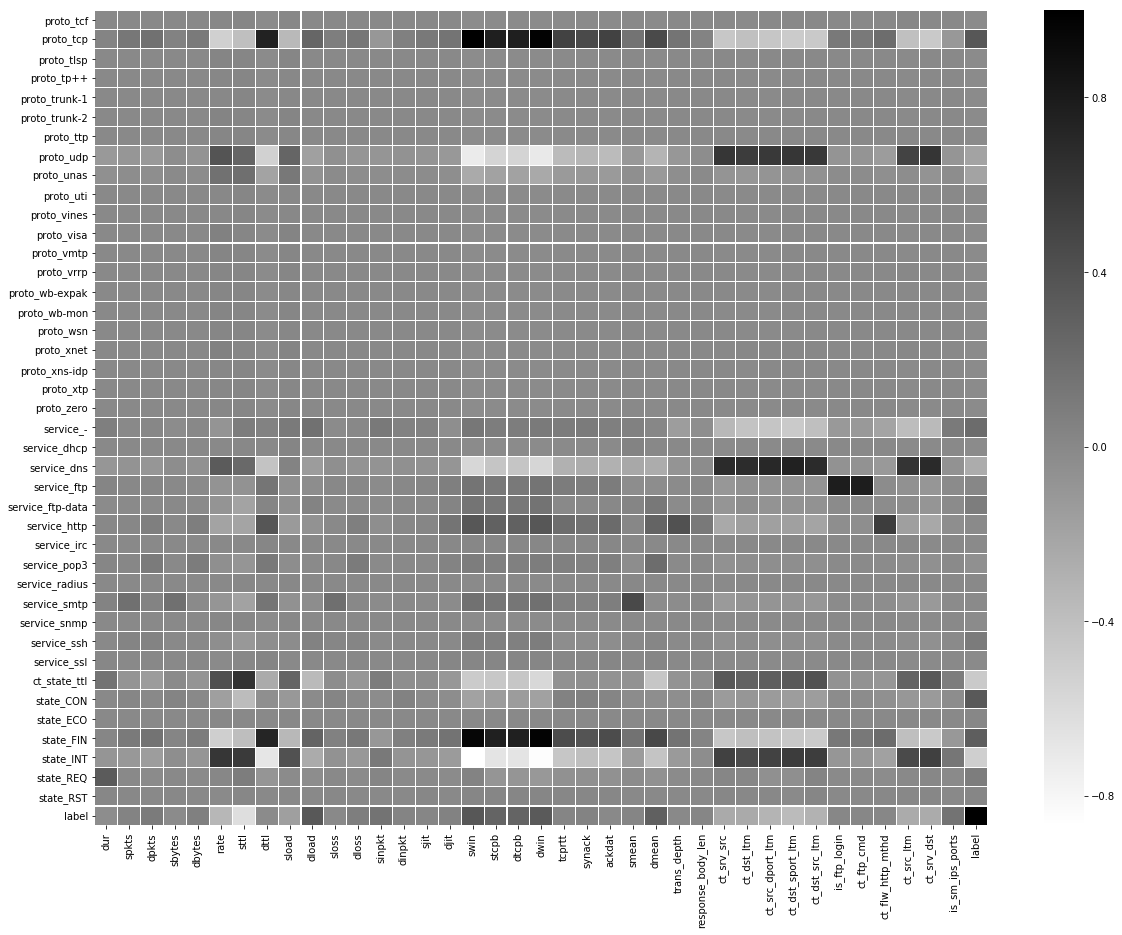

In [20]:
plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix.loc[proto_features[proto_features.index('proto_tcf'):] + 
                                service_features + 
                                state_features + ['label'], 
                           numeric_features + ['label']], linewidths=.05, cmap="binary")

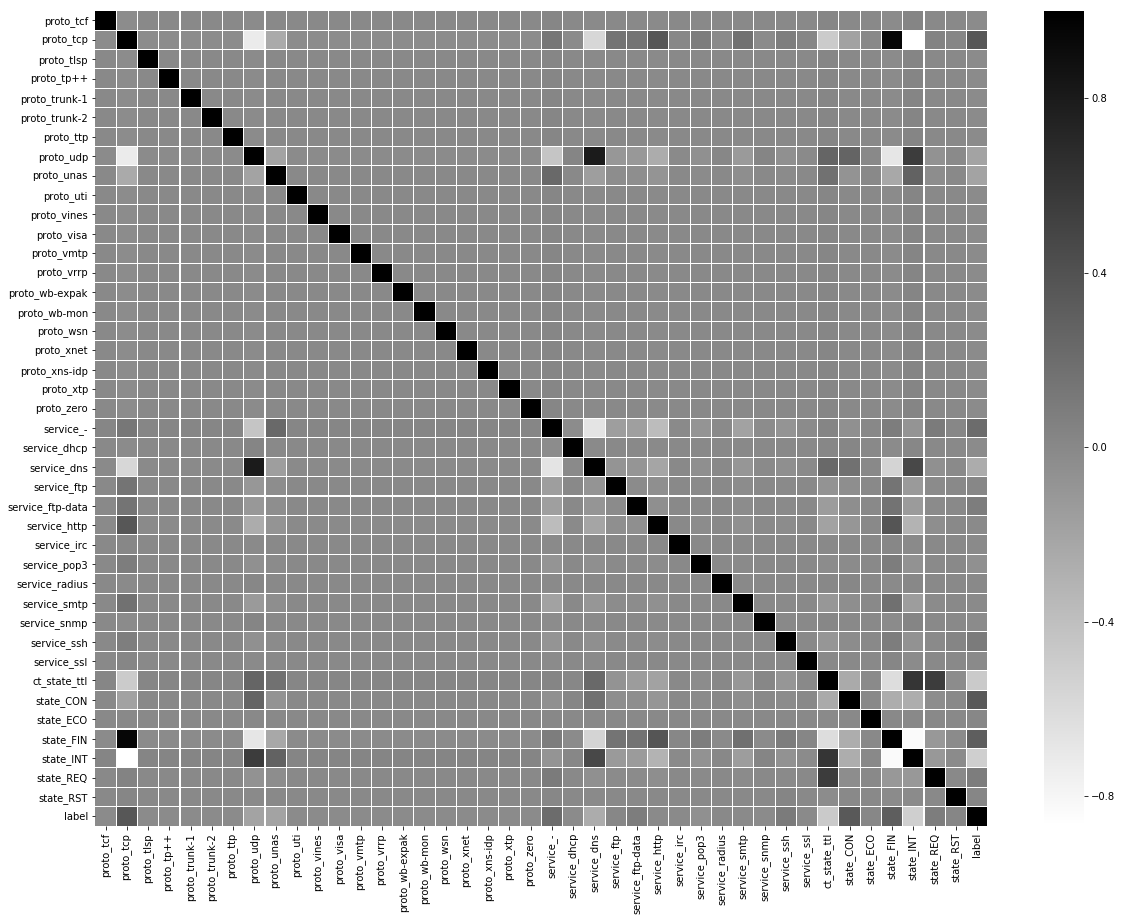

In [21]:
plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix.loc[proto_features[proto_features.index('proto_tcf'):] + 
                                service_features + 
                                state_features + ['label'], 
                           proto_features[proto_features.index('proto_tcf'):] + 
                                service_features + 
                                state_features + ['label']], linewidths=.05, cmap="binary")

Атрибуты, для которых корреляция с целевым значением - положительна

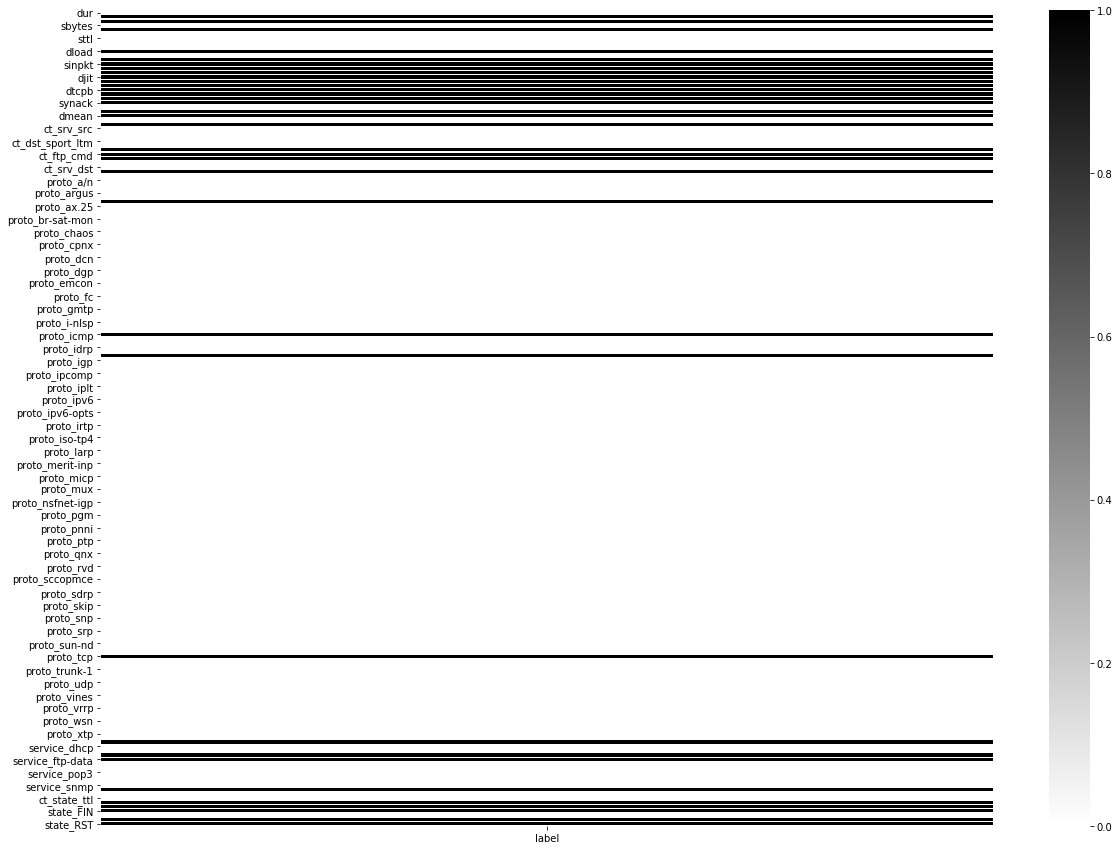

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix.loc[numeric_features + feat, 
                            ['label']] > 0, linewidths=.05, cmap="binary")

# \# 2. Выбор метрики

Так как классы несбалансированы - будем смотреть в `f1`, но так же обращать внимание на матрицу состояний и `recall` по классам

# \# 3. Выбор модели

Наиболее популярные модели:
* Деревья (обычные/усиленные/лес)
* SVM
* kNN

Разделим датасет на обучающий и тестовый (стратифицируем по классам):

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df_train, df_test, dfy_train, dfy_test = train_test_split(df_.drop(['label'], axis=1), 
                                                            df_y, 
                                                            stratify=df_y, 
                                                            test_size=0.3, 
                                                            random_state=19, 
                                                            shuffle=True)

df_train.shape, df_test.shape, dfy_train.shape, dfy_test.shape

((180371, 191), (77302, 191), (180371,), (77302,))

Определим функцию зависимости результата на обучении и валидации при варьировании одного из гипермпараметров модели

In [19]:
def plot_cv_results(grid, param='param_n_neighbors', scale='linear'):
    '''
    This function plots gridsearch results for given grid search object. It can only plot 
    results for one parameter (default parameter is C).
    '''
    plt.figure(figsize=(10,6))
    plt.plot(grid.cv_results_[param].tolist(), grid.cv_results_['mean_train_score'], label='Train Score')
    plt.fill_between(grid.cv_results_[param].tolist(), 
                     grid.cv_results_['mean_train_score'] - grid.cv_results_['std_train_score']/2, 
                     grid.cv_results_['mean_train_score'] + grid.cv_results_['std_train_score']/2, 
                     alpha=.3)
    plt.plot(grid.cv_results_[param].tolist(), grid.cv_results_['mean_test_score'], label='Validation Score')
    plt.fill_between(grid.cv_results_[param].tolist(), 
                     grid.cv_results_['mean_test_score'] - grid.cv_results_['std_test_score']/2, 
                     grid.cv_results_['mean_test_score'] + grid.cv_results_['std_test_score']/2, 
                     alpha=.3)
    plt.ylabel('f1')
    plt.xlabel(param.strip('param_'))
    plt.title('Validation Curve')
    plt.legend()
    plt.xscale(scale)
    plt.show()

Определим функцию для графической интерпретации ошибок первого и второго рода

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## \# 3.1 SVM

In [27]:
classifier = LinearSVC()
svc_set = LinearSVC(penalty="l2", loss="squared_hinge", dual=True, tol=1e-3)
parameters = {'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}
grid = GridSearchCV(svc_set, param_grid=parameters, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1, n_jobs=-1)
grid.fit(df_train, dfy_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [27]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test), 
                            target_names = ['Malicious', 'Normal']))

             precision    recall  f1-score   support

  Malicious       0.87      0.75      0.81     49402
     Normal       0.65      0.80      0.71     27898

avg / total       0.79      0.77      0.77     77300



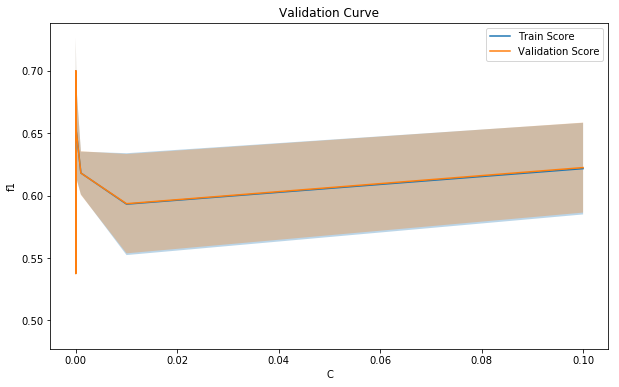

In [28]:
plot_cv_results(grid, param = 'param_C')

In [29]:
grid.best_params_

{'C': 1e-05}

Confusion matrix, without normalization
[[37219 12183]
 [ 5708 22190]]


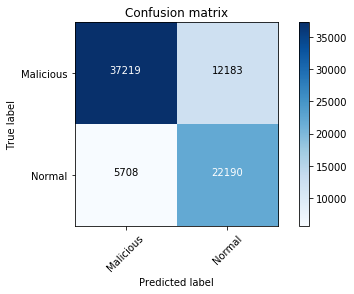

In [30]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)), 
                      classes = ['Malicious', 'Normal'])

Normalized confusion matrix
[[0.75339055 0.24660945]
 [0.20460248 0.79539752]]


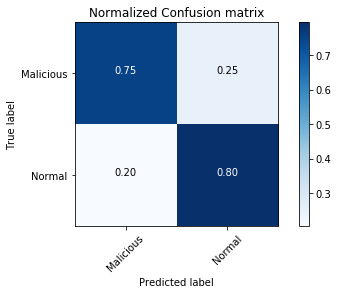

In [31]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

Попробуем `MinMaxScaler` для данных

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [29]:
grid.fit(df_train_scaled, dfy_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [30]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test_scaled),
                            target_names = ['Malicious', 'Normal']))

             precision    recall  f1-score   support

  Malicious       0.87      0.98      0.92     49402
     Normal       0.95      0.75      0.84     27900

avg / total       0.90      0.90      0.89     77302



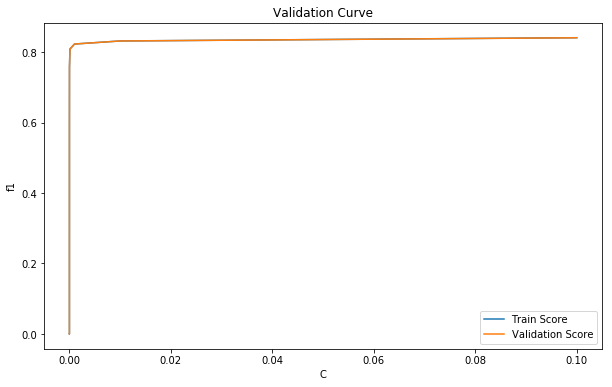

In [31]:
plot_cv_results(grid, param = 'param_C')

In [32]:
grid.best_params_

{'C': 0.1}

Confusion matrix, without normalization
[[48330  1072]
 [ 6968 20932]]


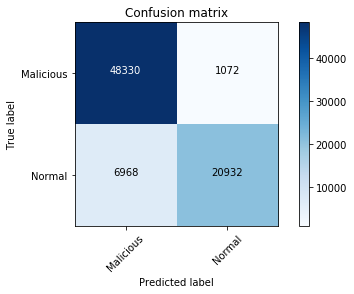

In [33]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test_scaled)), 
                      classes = ['Malicious', 'Normal'])

Normalized confusion matrix
[[0.97830047 0.02169953]
 [0.2497491  0.7502509 ]]


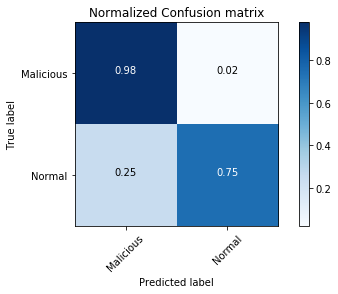

In [34]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test_scaled)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

## \# 3.2 kNN

In [21]:
knn_set = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors': list(np.arange(1, 10)) + list(np.linspace(10, 100, 15, dtype=int))}
grid = GridSearchCV(knn_set, 
                    param_grid=parameters, cv=StratifiedKFold(n_splits=5, random_state=19), 
                    scoring='f1', verbose=1, n_jobs=-1)
grid.fit(df_train, dfy_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 24.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 22, 29, 35, 42, 48, 55, 61, 67, 74, 80, 87, 93, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [22]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test), 
                            target_names = ['Malicious', 'Normal']))

             precision    recall  f1-score   support

  Malicious       0.85      0.95      0.90     49402
     Normal       0.89      0.71      0.79     27900

avg / total       0.86      0.86      0.86     77302



In [23]:
grid.best_params_

{'n_neighbors': 16}

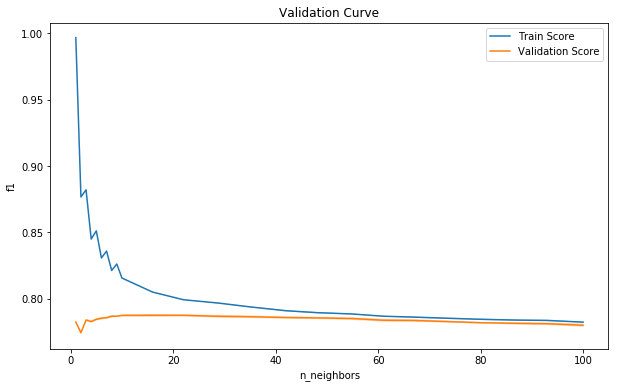

In [24]:
plot_cv_results(grid, param = 'param_n_neighbors')

Confusion matrix, without normalization
[[46890  2512]
 [ 8221 19679]]


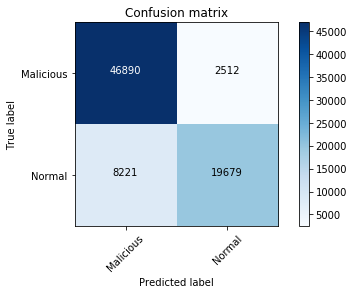

In [25]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)), 
                      classes = ['Malicious', 'Normal'])

Normalized confusion matrix
[[0.94915186 0.05084814]
 [0.2946595  0.7053405 ]]


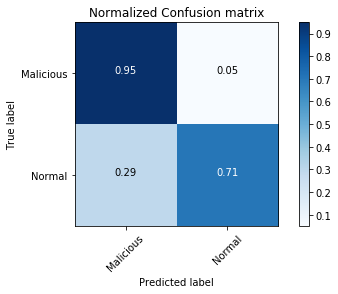

In [26]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

Попробуем `MinMaxScaling` для данных (не выходит, как и с `StandartScaler` - вешает всю машину, ничего не могу с этим сделать - за час с лишним никакого verbose ответа от алгоритма)

In [43]:
#knn_set = KNeighborsClassifier(n_jobs=-1)
#parameters = {'n_neighbors': list(np.arange(1, 10)) + list(np.linspace(10, 100, 15, dtype=int))}
#grid = GridSearchCV(knn_set, param_grid=parameters, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1, n_jobs=-1)
#grid.fit(df_train_scaled, dfy_train)

In [44]:
#print(classification_report(dfy_test, grid.best_estimator_.predict(df_test_scaled), target_names = ['Malicious', 'Normal']))

In [45]:
#plot_cv_results(grid, param = 'param_n_neighbors')

In [46]:
#plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test_scaled)), \
#                                       classes = ['Malicious', 'Normal'])

In [47]:
#plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test_scaled)),\
#                      normalize=True, \
#                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

## \# 3.3 RandomForest

По `n_estimators` оптимизация не производилась - прирост метрики от усложнения модели составлял не более $10^{-5}$

In [46]:
rf_set = RandomForestClassifier(n_jobs=-1)
parameters = {'min_samples_split' : list(range(2,5)),
              'max_depth': list(range(9,20)), 
              'min_samples_leaf': list(range(1,5)), 
             }
grid = GridSearchCV(rf_set, 
                    param_grid=parameters, cv=StratifiedKFold(n_splits=5, random_state=19), 
                    scoring='f1', verbose=1, n_jobs=-1
                   )
grid.fit(df_train, dfy_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:  6.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [47]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test), 
                            target_names = ['Malicious', 'Normal'], digits=5))

             precision    recall  f1-score   support

  Malicious    0.95496   0.95403   0.95449     49402
     Normal    0.91874   0.92032   0.91953     27900

avg / total    0.94189   0.94186   0.94188     77302



Confusion matrix, without normalization
[[47131  2271]
 [ 2223 25677]]


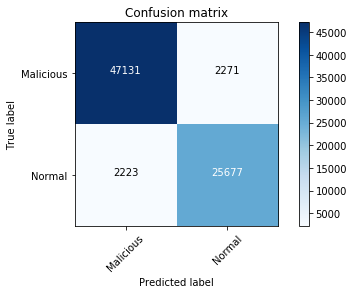

In [48]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)), 
                      classes = ['Malicious', 'Normal'])

Normalized confusion matrix
[[0.9540302  0.0459698 ]
 [0.07967742 0.92032258]]


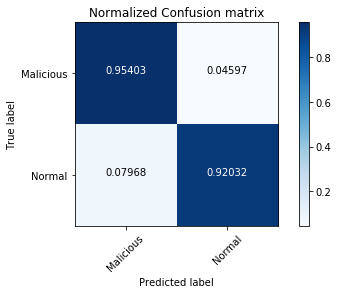

In [49]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

In [50]:
grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4}

## 3.3.1 XGBoost

Один из видов моделей, который позволяет усиливать (бустить) "слабые" деревья - тем самым из $N$ слабых деревьев мы строим ансамбль (где задачей каждого последующего дерева - минимизация ошибок предыдущего), который будет "сильным" классификатором. Это самая продвинутая техника для построения классификаторов.

Подробнее про этот тип моделей можно почитать в https://statweb.stanford.edu/~jhf/ftp/trebst.pdf

In [51]:
from xgboost import XGBClassifier, plot_importance

xgb_model = XGBClassifier(n_jobs=-1)
grid = GridSearchCV(xgb_model,
                    {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                     cv=StratifiedKFold(n_splits=5, random_state=19), 
                     scoring='f1', verbose=1, n_jobs=-1
                   )
grid.fit(df_train, dfy_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 14.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [52]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test),
                            target_names = ['Malicious', 'Normal'], digits=7))

             precision    recall  f1-score   support

  Malicious  0.9644489 0.9483624 0.9563380     49402
     Normal  0.9111892 0.9381004 0.9244490     27900

avg / total  0.9452263 0.9446586 0.9448286     77302



c:\users\neveroyatnii\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Проверим на переобучение:

In [53]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [54]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Normalized confusion matrix
[[0.94836241 0.05163759]
 [0.06189964 0.93810036]]


c:\users\neveroyatnii\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


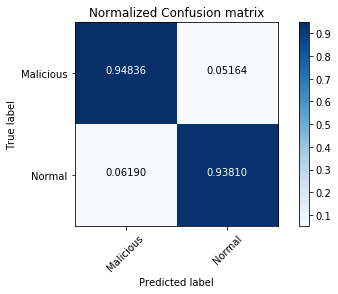

In [55]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')

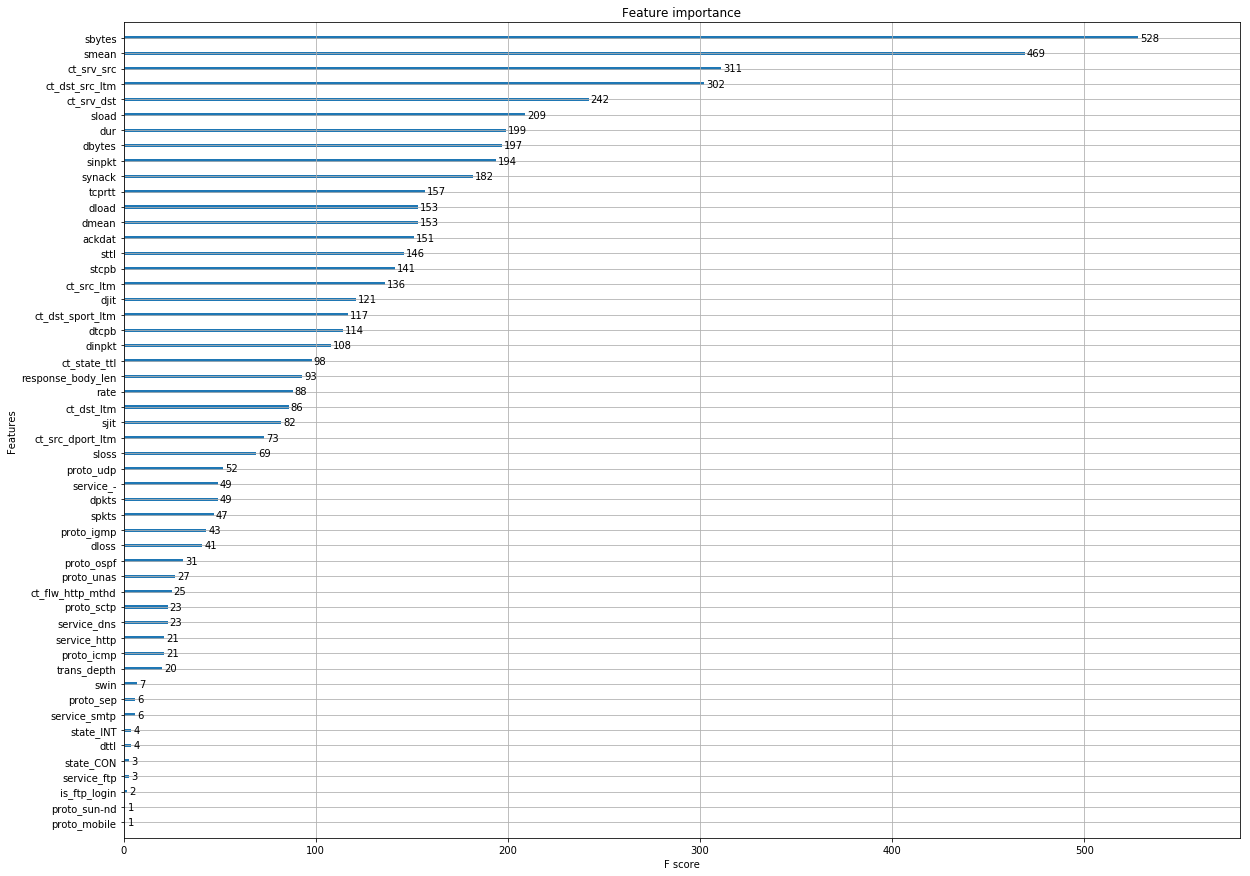

In [56]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_importance(grid.best_estimator_, ax)

## 3.3.2 Обычное дерево

In [57]:
from sklearn.tree import DecisionTreeClassifier

dct_set = DecisionTreeClassifier()
parameters = {'min_samples_split' : list(range(2,5)),
              'max_depth': list(range(9,20)), 
              'min_samples_leaf': list(range(1,5)), 
             }
grid = GridSearchCV(dct_set, 
                    param_grid=parameters, cv=StratifiedKFold(n_splits=5, random_state=19), 
                    scoring='f1', verbose=1, n_jobs=-1
                   )
grid.fit(df_train, dfy_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:  6.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [58]:
print(classification_report(dfy_test, grid.best_estimator_.predict(df_test), 
                            target_names = ['Malicious', 'Normal'], digits=5))

             precision    recall  f1-score   support

  Malicious    0.96132   0.94286   0.95200     49402
     Normal    0.90215   0.93283   0.91723     27900

avg / total    0.93996   0.93924   0.93945     77302



In [59]:
grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion matrix, without normalization
[[46579  2823]
 [ 1874 26026]]


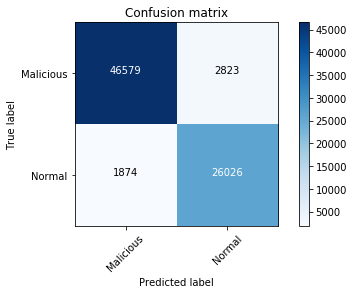

In [60]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)), 
                      classes = ['Malicious', 'Normal'])

Normalized confusion matrix
[[0.94285656 0.05714344]
 [0.06716846 0.93283154]]


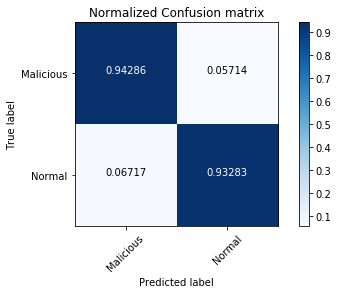

In [61]:
plot_confusion_matrix(confusion_matrix(dfy_test, grid.best_estimator_.predict(df_test)),
                      normalize=True, 
                      classes = ['Malicious', 'Normal'], title='Normalized Confusion matrix')